# Resample de una serie temporal con pandas

* Pandas permite realizar remuestrreos de las series temporales (DataFrames con índices de tiempo)

* Los métodos disponibles son 
    * __resample()__ vuelve a muestrear la serie temporal y aplica un afunción a cada grupo
    * __asfreq()__ devuelve uno de los valores del grupo y permite un método de relleno

Ambos métodos permiten usar distintas frequencias definidas por ``códigos offset`` que puedes ver en:

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

Ejemplo de cómo funciona le método __resample()__
<br>
<br>
<br>
<left>
<img src="imgs/resample.png"  alt="drawing" width="40%"/>
</left>


Veamos unos ejemplos básicos:

In [3]:
#! pip install datetime
from datetime import datetime, date, time, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# generamos una serie temporal usando un rango:

rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.DataFrame(np.random.randn(len(rng)), index=rng)
ts

,0
2000-01-01,-1.033667
2000-01-02,1.224089
2000-01-03,-0.009481
2000-01-04,0.484882
2000-01-05,0.825253
...,...
2000-04-05,0.053142
2000-04-06,0.032290
2000-04-07,0.579863
2000-04-08,-0.611814


Calculamos el valor mesual medio

In [12]:
ts.resample('M').mean()

,0
2000-01-31,-0.120286
2000-02-29,0.001348
2000-03-31,0.035406
2000-04-30,0.009768


Calculamos el valor quincenal

In [13]:
ts.resample('15D').first()

,0
2000-01-01,0.420006
2000-01-16,-0.545838
2000-01-31,0.010613
2000-02-15,-1.201015
2000-03-01,-1.552874
2000-03-16,1.595595
2000-03-31,-0.336704


In [14]:
ts.resample('BM').mean()

,0
2000-01-31,-0.120286
2000-02-29,0.001348
2000-03-31,0.035406
2000-04-28,0.009768


Extraemos una neva serie temporal cogiendo el valor cada 5 días usando el método __asfreq()__

In [16]:
ts.asfreq('5D').head()


,0
2000-01-01,0.420006
2000-01-06,0.187042
2000-01-11,0.666231
2000-01-16,-0.545838
2000-01-21,-0.563967


__OJO:__ si no hay valores nos devuelve NaN

In [20]:
ts.asfreq('12H')

,0
2000-01-01 00:00:00,0.420006
2000-01-01 12:00:00,NaN
2000-01-02 00:00:00,0.141218
2000-01-02 12:00:00,NaN
2000-01-03 00:00:00,0.406539
...,...
2000-04-07 00:00:00,0.803427
2000-04-07 12:00:00,NaN
2000-04-08 00:00:00,-1.774450
2000-04-08 12:00:00,NaN


In [21]:
ts.asfreq('12H', fill_value=0)

,0
2000-01-01 00:00:00,0.420006
2000-01-01 12:00:00,0.000000
2000-01-02 00:00:00,0.141218
2000-01-02 12:00:00,0.000000
2000-01-03 00:00:00,0.406539
...,...
2000-04-07 00:00:00,0.803427
2000-04-07 12:00:00,0.000000
2000-04-08 00:00:00,-1.774450
2000-04-08 12:00:00,0.000000


## Ejercicios

Veamos un ejemplo con los datos de calidad del aire que usamos en notebooks anteriores

Carga el fichero air_quality_no2_long.csv del directorio data:

In [4]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv", parse_dates=["datetime"])
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


Coviértelo a un dataframe con una columna para cada "location":

In [7]:
no_2 = air_quality.pivot_table(values="value", index="datetime", columns="location")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


Calcula los valores medios mensuales

In [6]:
no_2.resample("M").mean()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,24.344156,27.908446,28.158433
2019-06-30 00:00:00+00:00,31.916667,27.499272,19.581152


Dibuja los valores medios diarios de las tres ubicaciones:

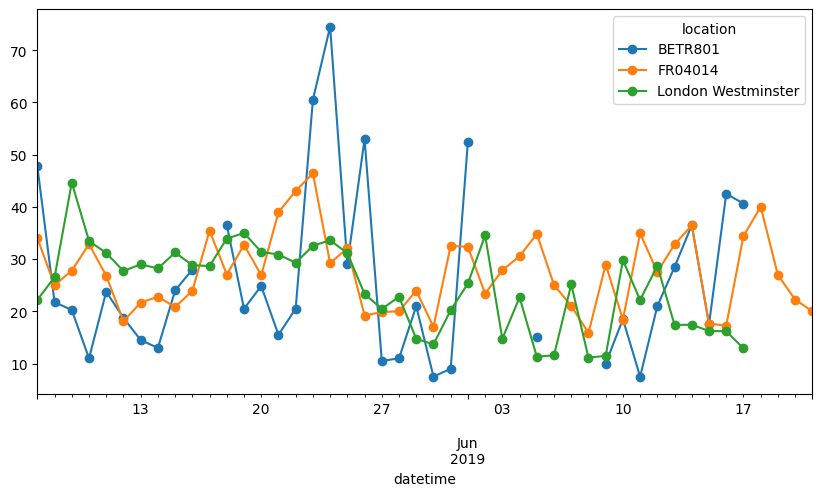

In [5]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

Genera un nuevo dataframe con valores cada 30 minutos

In [10]:
no_2.asfreq(freq="30T")

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 01:30:00+00:00,NaN,NaN,NaN
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 02:30:00+00:00,NaN,NaN,NaN
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
...,...,...,...
2019-06-20 22:00:00+00:00,NaN,26.5,NaN
2019-06-20 22:30:00+00:00,NaN,NaN,NaN
2019-06-20 23:00:00+00:00,NaN,21.8,NaN


Genera un nuevo dataframe con valores cada 30 minutos pero rellenando los valores que no existan con un 0

In [8]:

no_2.asfreq(freq="30T", fill_value=0)

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 01:30:00+00:00,0.0,0.0,0.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 02:30:00+00:00,0.0,0.0,0.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
...,...,...,...
2019-06-20 22:00:00+00:00,NaN,26.5,NaN
2019-06-20 22:30:00+00:00,0.0,0.0,0.0
2019-06-20 23:00:00+00:00,NaN,21.8,NaN
